<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="https://prob140.github.io/assets/icon_sp21.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Fall 2021</h4><p>Ani Adhikari</p>CC BY-NC-SA 4.0</div></td></tr></table><!-- not in pdf -->

This content is protected and may not be shared, uploaded, or distributed.

In [1]:
import warnings
warnings.filterwarnings('ignore')

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from scipy import special

# Homework 2 #

### Instructions

Your homeworks have two components: a written portion and a portion that also involves code.  Written work should be completed on paper, and coding questions should be done in the notebook.  You are welcome to $\LaTeX$ your answers to the written portions, but staff will not be able to assist you with $\LaTeX$ related issues. It is your responsibility to ensure that both components of the homework are submitted completely and properly to Gradescope. **Make sure to assign each page of your pdf to the correct question.** Refer to the bottom of the notebook for submission instructions.

**NOTE:** If you are trying to find the distribution of a random variable, please start with the possible values, not the probabilities. The staff would like to acknowledge John Tsortos of the Spring 2020 class for the following immortal meme; please note the "rip" below the image.

<img src="hw2_meme.png" width="400"/>

## 1. Independence and Symmetry ##

Let the integer valued random variable $X$ have distribution given by 

$$
P(X = i) ~ = ~ \frac{p}{i + 1}, ~~~~~ 0 \le i \le 20
$$

for some constant $p$.

**a)** Complete the cell below so that the last line evaluates to the numerical value of $p$. 

In [ ]:
#student
p = ...
p

In [2]:
#solution
p = 1 / sum(1/(np.arange(1, 22))) 
p

0.27432142650145275

**b)** Complete the cell below to display the probability histogram of $X$.

In [ ]:
#student
# array of possible values
i = ...

# array of corresponding probabilities
probs = ...

dist = Table().values(i).probabilities(probs)
Plot(dist)

plt.xlabel('$i$')
plt.title('Distribution of $X$');

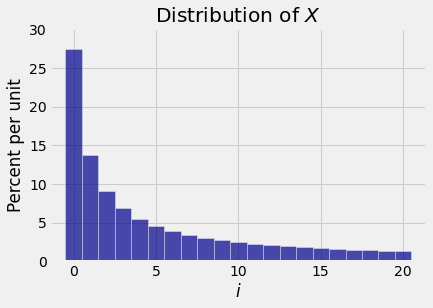

In [3]:
#solution
# array of possible values
i = np.arange(0, 21)

# array of corresponding probabilities
probs = p/(i + 1)

dist = Table().values(i).probabilities(probs)
Plot(dist)

plt.xlabel('$i$')
plt.title('Distribution of $X$');

**c)** Let $X$ be as above and let $X$ and $Y$ be independent and identically distributed. For each pair below, fill in the blank with $=$ or $\stackrel{d}{=}$ (picking the stronger one if both are applicable), or with neither. Remember to explain.

(i) $2X = X+X ~~ \underline{~~~~~~~~~~~~~~} ~~ X+Y$

(ii) $X-Y ~~ \underline{~~~~~~~~~~~~~~} ~~ Y-X$

**d)** Write a math expression for $P(X=Y)$, and then use it to find $P(X > Y)$ and $P(X < Y)$. You're welcome to just use the symbol $p$ in your expressions, instead of its numerical value.

**e)** Write a math expression for $P(X > 2Y + 1)$. 

#staff

c(ii) is easy to guess and hard to establish. It's fine to accept "by symmetry" as an answer as long as students are clear about why the same "symmetry" doesn't apply in c(i). Independence is the key.

#solution

### [Solution] Independence and Symmetry ###

**c)** (i) neither. The possible values are different because $2X$ has to be an even number.

(ii) $\stackrel{d}{=}$. They are clearly not equal because $X-Y = -(Y-X)$. But they have the same distribution because $X \stackrel{d}{=} Y$, $-Y \stackrel{d}{=} -X$, $X$ and $-Y$ are independent, and $Y$ and $-X$ are independent.

**d)** $\displaystyle P(X = Y) = \sum_{i=0}^{20} \left( \frac{p}{i+1} \right)^2$

$P(X > Y) = P(X-Y > 0) = P(Y-X > 0) = P(Y > X)$. Since $1 = P(X > Y) + P(X=Y) + P(Y<X)$, we have

$P(X > Y) = P(Y > X) = \frac{1}{2}(1 - P(X=Y))$.

Notice that this only uses the fact that $X$ and $Y$ are i.i.d. (specifically, Part **c(ii)**), not the form of the distribution of $X$.

**e)** $P(X > 2Y + 1) = \displaystyle \sum_{j=0}^9 \frac{p}{j+1} \left(\sum_{i=2j+2}^{20} \frac{p}{i+1}\right)$

## 2. Sample Maximum ##

**a)** Let $N$ be a fixed positive integer. Let $X$ be a random variable that has possible values $\{1, 2, \ldots, N\}$. Consider the probabilities $F(m) = P(X \le m)$ for $m \ge 1$. It's a good idea to draw a number line and color the event $\{ X \le m \}$ for a generic $m$. 

For $1 \le k \le N$, write $P(X = k)$ in terms of the values $F(m)$ for $m \ge 1$. If you get stuck, take a look at [Example 2.2.2](http://prob140.org/textbook/content/Chapter_02/02_Examples.html#example-2-maximum-of-12-rolls-of-a-die) in the textbook. 

**b)** Let $X_1, X_2, \ldots, X_n$ be the results of $n$ draws made at random with replacement from $\{1, 2, \ldots, N\}$. Let $M = \max\{X_1, X_2, \ldots, X_n\}$. Use the method developed in Part **a** to find the distribution of $M$.

[Think about how $M$ can be at most $m$. For this to happen, how big can $X_1$ be? What about $X_2$? If you have trouble starting out in the general case, pick some small numbers like $N=10$, $m=4$, and $n=3$ to see what's going on.]

**c)** Now let $X_1, X_2, \ldots, X_n$ be the results of $n$ draws made at random without replacement from $\{1, 2, \ldots, N\}$. You can assume $n \le N$ in this case. Let $M = \max\{X_1, X_2, \ldots, X_n\}$. Use the method developed in Part **a** to find the distribution of $M$. Start by carefully specifying the possible values of $M$.

#solution

### [Solution] Sample Maximum ###

**a)** $P(X = 1) = F(1)$ and $P(X = k) = F(k) - F(k-1)$ for $2 \le k \le N$.

**b)** Possible values of $M$: $\{1, 2, \ldots, N\}$

For $1 \le m \le N$, $\displaystyle P(M \le m) = P(X_1 \le m, X_2 \le m, ..., X_n \le m) = \prod_{i=1}^n P(X_i \le m)$ by independence. So $\displaystyle P(M \le m) = \left( \frac{m}{N} \right)^n$.

By **a**, $\displaystyle P(M = 1) = \left( \frac{m}{N} \right)^n$ and $\displaystyle P(M = m) = \left( \frac{m}{N} \right)^n - \left( \frac{m-1}{N} \right)^n$ for $2 \le m \le N$.

**c)** Possible values of $M$: $\{n, n+1, \ldots, N\}$.

For $n \le m \le N$, $\displaystyle P(M \le m) = P(X_1 \le m, X_2 \le m, ..., X_n \le m) = \frac{\binom{m}{n}\binom{N-m}{0}}{\binom{N}{n}}$ by thinking of the values $1$ through $m$ as the good elements and the rest as bad.

Now use $P(M=m) = P(M \le m) - P(M \le m-1)$, remembering that $P(M \le n-1) = 0$. 

## 3. Counting Categories ##
In each part below, remember to **explain your answer. Don't just write down a formula.** You don't have to provide decimal answers. 

A population consists of 6 individuals in each of 4 categories $A$, $B$, $C$, and $D$. A simple random sample of 12 individuals is chosen from the population.

**a)** Find the chance that the sample contains equal numbers of individuals in the four categories.

**b)** Find the chance that the sample contains 5 individuals in one category, 4 in another, 2 in a third, and 1 in the remaining category.

**c)** Find the chance that the sample contains 4 individuals in each of two categories, 3 individuals in another, and 1 in the remaining category.

**d)** Find the chance that the sample contains all 6 individuals in one category and equal numbers in the other three.


#staff

See the video right at the end of [Sec 5.4](http://prob140.org/textbook/content/Chapter_05/04_Sampling_Without_Replacement.html) for how to do these. They are quite repetitive, so if we always do them the same way then students will learn one correct method.

#solution

### [Solution] Counting Categories ###


**a)** $\displaystyle P(3 \text{As, } 3 \text{Bs, } 3 \text{Cs, } 3 \text{Ds}) = \frac{\binom{6}{3}\binom{6}{3}\binom{6}{3}\binom{6}{3}}{\binom{24}{12}}$

**b)** $\displaystyle P(5 \text{As, } 4 \text{Bs, } 2 \text{Cs, } 1 \text{D}) = 
\frac{\binom{6}{5}\binom{6}{4}\binom{6}{2}\binom{6}{1}}{\binom{24}{12}}$. So answer $\displaystyle  = 4 \cdot 3 \cdot 2 \cdot 1 \cdot \frac{\binom{6}{5}\binom{6}{4}\binom{6}{2}\binom{6}{1}}{\binom{24}{12}}$

**c)** $\displaystyle P(4 \text{As, } 4 \text{Bs, } 3 \text{Cs, } 1 \text{D}) = 
\frac{\binom{6}{4}\binom{6}{4}\binom{6}{3}\binom{6}{1}}{\binom{24}{12}}$. So answer $\displaystyle  = \binom{4}{2} \cdot 2 \cdot 1 \cdot \frac{\binom{6}{4}\binom{6}{4}\binom{6}{3}\binom{6}{1}}{\binom{24}{12}}$

**d)** $\displaystyle P(6 \text{As, } 2 \text{Bs, } 2 \text{Cs, } 2 \text{Ds}) = 
\frac{\binom{6}{6}\binom{6}{2}\binom{6}{2}\binom{6}{2}}{\binom{24}{12}}$. So answer $\displaystyle  = 4 \cdot \binom{3}{3} \cdot \frac{\binom{6}{6}\binom{6}{2}\binom{6}{2}\binom{6}{2}}{\binom{24}{12}}$

## 4. Four Hands ##
A standard deck consists of 52 cards of which 4 are aces. In card games such as bridge, the deck is split randomly and evenly between four players.

A well-shuffled standard deck is dealt (from now on, this will mean at random without replacement) to four players so that each player gets 13 cards. For $1 \le i \le 4$, let $X_i$ be the number of aces in the hand of Player $i$.

**a)** Find the distribution of $X_3$.

**b)** For each pair below, fill in the blank with $=$ or $\stackrel{d}{=}$ (picking the stronger one if both are applicable), or with neither. Remember to explain.

(i) $X_1 + X_3 ~~ \underline{~~~~~~~~~~~~~~} ~~ X_2 + X_4$

(ii) $X_1 + X_3 ~~ \underline{~~~~~~~~~~~~~~} ~~ 4 - (X_2 + X_4)$

**c)** Find $P(X_i = 1 \text{ for all } i)$.

#solution

### [Solution] Four Hands ###

**a)** Hypergeometric$(52, 13, 4)$ by symmetry of simple random sampling.

**b)** (i) $\stackrel{d}{=}$ by symmetry of simple random sampling. They're not equal because for example the left hand side can be $0$, forcing the hand side to be $4$.

(ii) $=$; all the cards are dealt out to one of the players. Since there are 4 aces total, if Players 2 and 4 have a combined $k$ aces, Players 1 and 3 must have a combined $4-k$ aces.

**c)** $\displaystyle \frac{\binom{4}{1}\binom{48}{12}}{\binom{52}{13}} \cdot \frac{\binom{3}{1}\binom{36}{12}}{\binom{39}{13}} \cdot \frac{\binom{2}{1}\binom{24}{12}}{\binom{26}{13}} \cdot \frac{\binom{1}{1}\binom{12}{12}}{\binom{13}{13}}$

The last factor is 1, which makes sense. Given Hands 1-3, there are no choices left for Hand 4.

## 5. Exact Value or Bound ##
In each part below, find the exact value of the probability if it is possible to do so with the information given. If it is not possible, provide the best lower and upper bounds you can.

**a)** the chance that at least one of 10 flights at an airport is late, if each flight at the airport has a 1% chance of being late

**b)** the chance that not all suits appear in a bridge hand of 13 cards dealt at random without replacement from a standard deck 

[A standard deck consists of 13 cards in each of 4 suits, making 52 cards in all.]

**c)** the chance that all $s$ office hours slots are selected, if each of $g$ GSIs selects one of the $s$ slots at random without being influenced by the choices of others

**d)** the chance that it rains every day next week if the daily chances of rain are given by

|Sun  |Mon  |Tue  |Wed  |Thu  |Fri  |Sat  |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|0.9|0.95|0.95|0.9|0.9|0.85|0.8|

#solution

### [Solution] Exact Value or Bound ###

**a)** There's no information about the dependence between flights, so we can only bound. Draw some possible Venn diagrams, especially the extreme cases. 

The lower bound is $0.01$, since $P\left( \bigcup_{i=1}^{10}\{\text{Flight i is late}\} \right) \ge \max_i \left(P(\{\text{Flight i is late}\}) \right)$. 

For the upper bound, $P(\text{at least one flight late}) = P\left( \bigcup_{i=1}^{10}\{\text{Flight } i \text{ is late}\} \right) \le 10 \times 0.01 = 0.1$.

**b)** Probabilistic assumption: draws at random without replacement

Let $A_i$ be the event that suit $i$ doesn't appear. 

$P(\text{not all suits appear}) = P(\text{at least one suit does not appear}) = P\left(\bigcup_{i=1}^4 A_i\right) =
4 \frac{\binom{39}{13}}{\binom{52}{13}} - \binom{4}{2} \frac{\binom{26}{13}}{\binom{52}{13}} + \binom{4}{3} \frac{\binom{13}{13}}{\binom{52}{13}}$ by inclusion-exclusion

To understand the pieces on the right hand side, consider the third one; the rest are similar. 
- $\binom{4}{3}$ is the number of terms in the sum
- $P(A_iA_jA_k) = \frac{\binom{52 - (3\times13)}{13}}{\binom{52}{13}}$ for all $i \ne j \ne k$

**c)** Probabilistic assumption: GSIs are choosing independently of each other

$P(\text{all slots are chosen}) = 1 - P(\text{at least one slot is not chosen})$. So use inclusion-exclusion with $A_i = $ "slot $i$ is not chosen".

$$\begin{align} 1 - P(\text{at least one slot is not chosen}) &= 1 - \left( s\left(\frac{s-1}{s}\right)^g - \binom{s}{2}\left(\frac{s-2}{s}\right)^g + \cdots + (-1)^s \binom{s}{s-1}\left(\frac{1}{s}\right)^g \right)\\ &=1 - \sum_{i=1}^{s-1}\left[ (-1)^{i+1}\binom{s}{i} \left(\frac{s-i}{s}\right)^g\right]\end{align}$$

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using an application. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.
* If you used $\LaTeX$ to do the written portions, you do not need to do any scanning; you can just download the whole notebook as a PDF via LaTeX.

### Code Portion ###
* Save your notebook using File > Save and Checkpoint.
* Generate a PDF file using File > Download as > PDF via LaTeX. This might take a few seconds and will automatically download a PDF version of this notebook.
    * If you have issues, please make a follow-up post on the general HW 2 Ed thread.
    
### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so. 
* Submit the assignment to Homework 2 on Gradescope. 
* **Make sure to assign each page of your pdf to the correct question.**
* **It is your responsibility to verify that all of your work shows up in your final PDF submission.**


### **We will not grade assignments which do not have pages selected for each question.** 